In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

sns.set_theme(style="whitegrid")

In [3]:
#load the dataset
df = pd.read_csv("social_media_engagement_dataset.csv")
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         10000 non-null  str    
 1   post_type        10000 non-null  str    
 2   post_length      10000 non-null  int64  
 3   views            10000 non-null  int64  
 4   likes            10000 non-null  int64  
 5   comments         10000 non-null  int64  
 6   shares           10000 non-null  int64  
 7   engagement_rate  10000 non-null  float64
dtypes: float64(1), int64(5), str(2)
memory usage: 625.1 KB
None


In [4]:
#handling missing values
print(df.isnull().sum())

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

categorical_columns = df.select_dtypes(include=['object', 'string']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())

platform           0
post_type          0
post_length        0
views              0
likes              0
comments           0
shares             0
engagement_rate    0
dtype: int64
platform           0
post_type          0
post_length        0
views              0
likes              0
comments           0
shares             0
engagement_rate    0
dtype: int64


In [ ]:
#encoding categorical variables
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(data_encoded.head())

   post_length   views  likes  comments  shares  engagement_rate  \
0           62   91660   2968       276     346         0.039166   
1          104  113115   4164       632     406         0.045989   
2           46   36043   3125       188     100         0.094692   
3           39  124886   5970       948     578         0.060023   
4           42   82831   8212      1104     334         0.116502   

   platform_Instagram  platform_Twitter  post_type_Text  post_type_Video  
0               False             False            True            False  
1                True             False           False             True  
2               False             False           False             True  
3               False             False           False            False  
4                True             False           False             True  


In [10]:
#summary statistics for numeric columns
df["Total_Engagement"] = df["likes"] + df["comments"] + df["shares"]
print(df[['likes', 'comments', 'shares', 'Total_Engagement']].describe())


             likes      comments        shares  Total_Engagement
count  10000.00000  10000.000000  10000.000000      10000.000000
mean    7033.26920    879.232800    602.262700       8514.764700
std     5673.59828    812.409438    597.573391       6898.648386
min       35.00000      3.000000      2.000000         43.000000
25%     2513.75000    275.000000    170.000000       3029.750000
50%     5580.50000    635.000000    406.000000       6732.000000
75%    10276.50000   1228.000000    837.000000      12391.250000
max    29486.00000   5435.000000   3861.000000      38270.000000


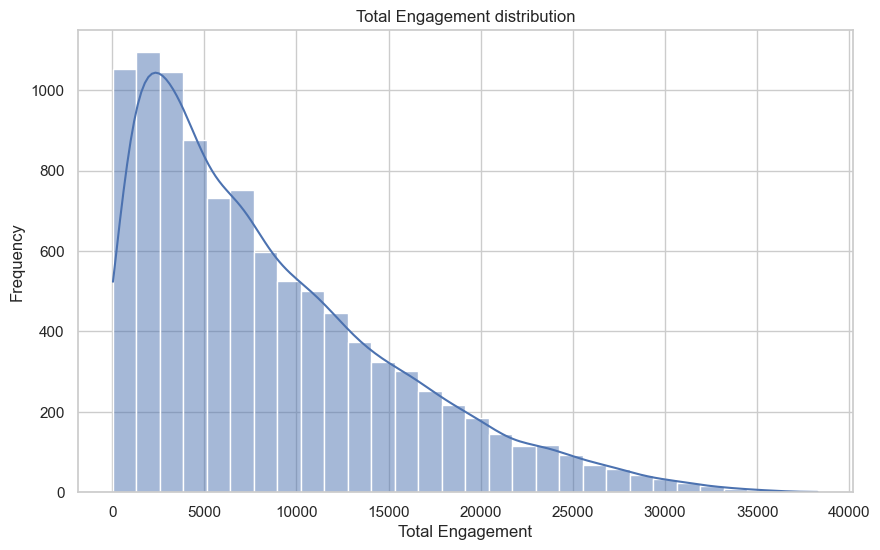

In [ ]:
#total engagement distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Engagement'], bins=30, kde=True)
plt.title('Total Engagement distribution')
plt.xlabel('Total Engagement')
plt.ylabel('Frequency')
plt.show()

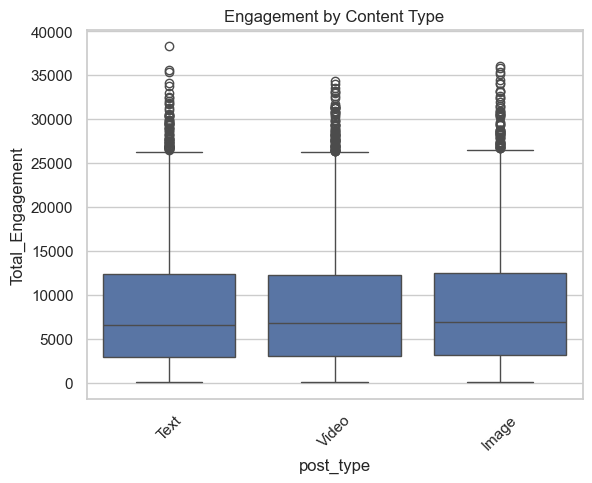

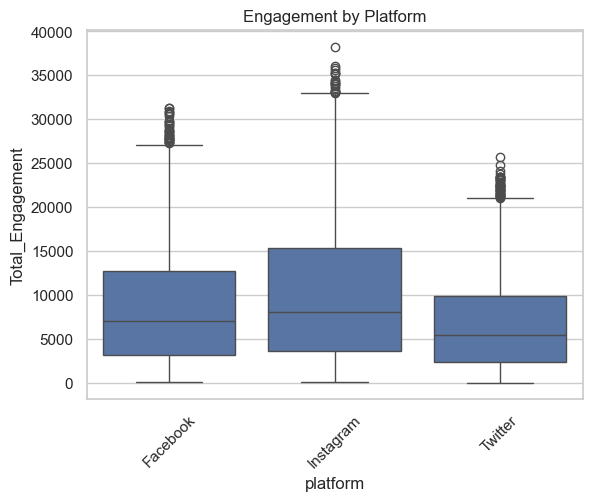

In [15]:
#user engagement by content type
plt.figure()
sns.boxplot(x='post_type', y='Total_Engagement', data=df)
plt.title("Engagement by Content Type")
plt.xticks(rotation=45)
plt.show()

#user engagement by platform
plt.figure()
sns.boxplot(x='platform', y='Total_Engagement', data=df)
plt.title("Engagement by Platform")
plt.xticks(rotation=45)
plt.show()

  post_type   platform  Total_Engagement
0     Image   Facebook       8884.993728
1     Image  Instagram      10273.122650
2     Image    Twitter       6652.149516
3      Text   Facebook       8431.325688
4      Text  Instagram      10048.198556
5      Text    Twitter       6715.414923
6     Video   Facebook       8458.156450
7     Video  Instagram      10415.787422
8     Video    Twitter       6737.572457


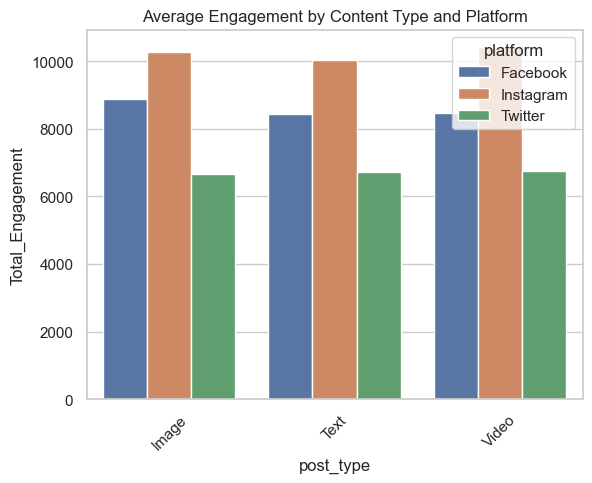

In [ ]:
#average engagement by content type and platform
grouped = df.groupby(['post_type', 'platform'])['Total_Engagement'].mean().reset_index()
print(grouped)
plt.figure()
sns.barplot(x='post_type', y='Total_Engagement', hue='platform', data=grouped)
plt.title("Average Engagement by Content Type and Platform")
plt.xticks(rotation=45)
plt.show()
